* EXAMEN INTENTO 1
" Analizando la Rotación de Clientes en Telecomunicaciones"

* La siguiente base de datos está relacionada a la rotación de clientes del área telecomunicaciones.

* Cada fila representa un cliente, cada columna contiene los atributos del cliente.

* Los datos sin procesar contienen 7043 filas (clientes) y 21 columnas (características).



In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
# La Base de datos se obtuvo de la pagina web Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)
path= "/content/drive/MyDrive/Bootcamp/BBDD/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [81]:
# .head() Nos permite ver las primeras 5 filas del DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
# Nos permite ver un resumen general del Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Al revisar los tipos de datos correspondientes a cada columna, podemos obervar que en TotalCharges es de tipo Object, pero si comparamos con los datos contenidos en el DataFrame visualizados con .head() en esta columna vemos que son datos tipo float.
Por lo tanto procederé con la modificación del tipo de dato para poder tratarlos numéricamente.

In [83]:
# Primero chequeo que no hayan espacios vacios
df["TotalCharges"] = df["TotalCharges"].str.strip()
df["TotalCharges"]

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.5
7039,7362.9
7040,346.45
7041,306.6


* No se observan datos vacios en la columna despues del strip.

In [84]:
# Luego cambio a int los valores de la columna
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"]

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


* Copilot me sugirió usar errors="coerce" al momento de escribir mi código para convertir valores no numéricos en NaN y evitar errores.
Me pareció una buena idea, por lo que procedí a utilizarlo.


In [85]:
#Compruebo que se hizo el cambio
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [86]:
# Verifico cuántos valores quedaron como NaN
df["TotalCharges"].isnull().sum()

np.int64(11)

Podemos observar que existen 11 valores NaN tras la conversión, se procede a revisa los datos estadísticos para ver si sirven para tomar una decision respecto a rellenar dichos datos.

In [87]:
df["TotalCharges"].describe().round(2)

,TotalCharges
count,7032.00
mean,2283.30
std,2266.77
min,18.80
25%,401.45
50%,1397.48
75%,3794.74
max,8684.80


* La alta dispersión y diferencia entre mediana y media observadas indican que no es adecuado rellenar NaN con estos valores.
* Procederé a revisar los datos de las 11 filas para ver qué otros datos me pueden aportar información para tomar una decisión.



In [88]:
# Busco la tabla completa de las filas que tienen datos null
df.loc[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Al revisar la información se observa que los datos NaN tienen en común los valores de la columna tenure = 0, lo que corresponde al número de meses que el cliente ha permanecido en la empresa, es por esto que se entiende que son clientes nuevos y aún no se aplican los cobros.


In [89]:
df[df["TotalCharges"].isnull()]["tenure"].value_counts()

,count
tenure,
0,11


Me confirma la hipótesis que todos los NaN en mi columna Total Charges son de clientes nuevos.
Asumiendo esta información procederé a rellenar los valores faltantes con cero.

In [90]:
df["TotalCharges"].fillna(0, inplace=True)

In [91]:
# Compruebo
df["TotalCharges"].isnull().sum()

np.int64(0)

In [92]:
# Busco nuevamente la tabla completa de las filas que tienen datos null para ver si se hixo efectivo el cambio
df.loc[df["TotalCharges"].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
# Chequeo si hay datos duplicados en las filas
df.duplicated().sum()

np.int64(0)

Al aplicar .duplicated() confirmo que no hay datos duplicados.

In [96]:
# Reviso las variables Categóricas
for col in df.columns:
    if df[col].dtype =="object":
        print("\nColumna:", col)
        print(df[col].value_counts())



Columna: customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

Columna: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Columna: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Columna: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Columna: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Columna: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Columna: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Columna: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Columna: O

Se revisaron las columnas de variables categóricas utilizando un ciclo for y se aplicó value_counts() Con esto se verificó que no hubiesen valores extraños o irregularidades en los datos.

# 2. Exploración de datos con Python

* 2.1 Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [18]:
import matplotlib.pyplot as plt

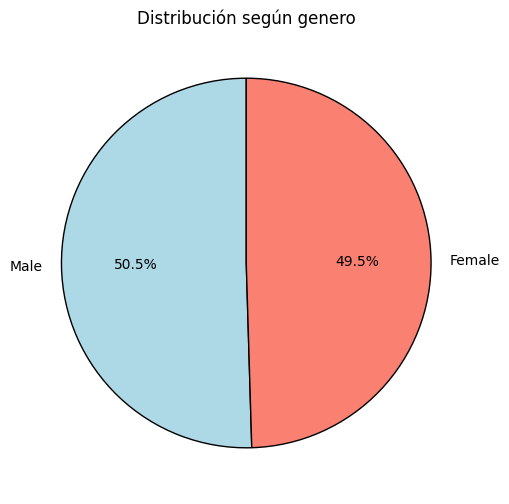

In [139]:
# Grafico Univariado 1

# Primero contar la cantidad de clientes por tipo de contrato.
genero = df["gender"].value_counts()

#Gráfico de Torta.
plt.figure(figsize=(6,6))
plt.pie(genero, labels= genero.index, autopct="%1.1f%%",
        startangle=90, colors=["lightblue", "salmon"],wedgeprops={'edgecolor': 'black'})

# Añadir el título.
plt.title("Distribución según genero")

# Mostrar.
plt.show()

* En este gráfico se compara la cantidad de clientes según género.
* Se observa que la distribución es prácticamente equivalente entre ambos géneros, con esto podemos concluir que el género no tiene mayor influencia en la contratación de los servicios.


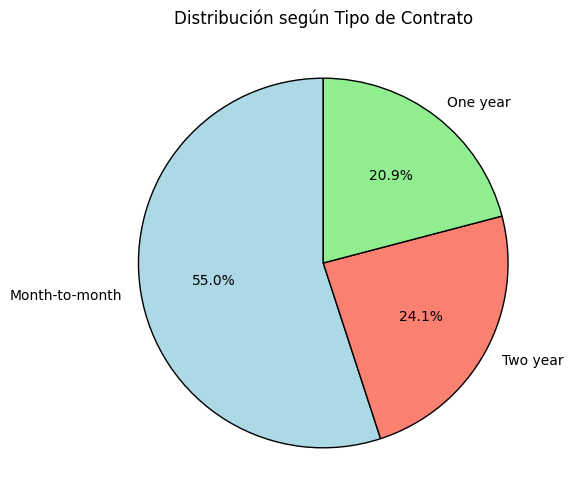

In [122]:
# Creacion de Gráfico univariado 2.

# Primero contar la cantidad de clientes por tipo de contrato.
clientes_vs_contratos = df["Contract"].value_counts()

# Pie Chart ó Gráfico de Torta.
plt.figure(figsize=(6,6))
plt.pie(clientes_vs_contratos, labels=clientes_vs_contratos.index, autopct="%1.1f%%",
        startangle=90, colors=["lightblue", "salmon", "lightgreen"],wedgeprops={'edgecolor': 'black'})

# Añadir el título.
plt.title("Distribución según Tipo de Contrato")

# Mostrar.
plt.show()

* Se observa que un poco más de la mitad de los clientes tienen contrato mensual(55.0%). Esta distribución podria presentar oportunidades para fidelizar estos clientes pasandolos a contrato anual o bi anual, y reducir la posibilidad de cancelación (Churn).

* 2.2 Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

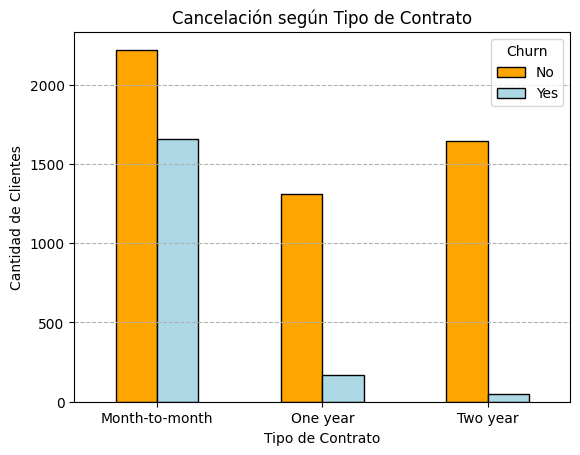

In [136]:
# Grafico Bivariado 1.

# Agrupamos datos
contrato_vs_churn = df.groupby(["Contract", "Churn"]).size().unstack()

# Gráfico de barras agrupadas
contrato_vs_churn.plot(kind="bar", edgecolor="black", color=["orange", "lightblue"])

# Títulos y etiquetas
plt.title("Cancelación según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.legend(title="Churn")
plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=0)

# Mostrar
plt.show()


* Este gráfico de comparación nos muestra según el tipo de contrato pactado si cancelaron o no los servicios

* Al analizar el gráfico se puede interpretar lo siguiente:

1.   En el gráfico de contrato mensual se observa que la diferencia entre las barras entre los clientes que se quedan y se van es significaticativamente menor que en los otros tipos de contrato . Esto nos permite confirmar que los clientes con contrato mensual tienen una tendencia más alta a la cancelación

2. Por el contrario, los que tienen contratos de uno o dos años tienen una tasa de cancelación mucho más baja, con lo que podriamos concluir que el tipo de contrato puede influir fuertemente en la fidelización del cliente, por lo que seria una buena idea pasar la gente de contratos mensuales a anuales o bianuales para lograr disminuir la taza de cancelación.


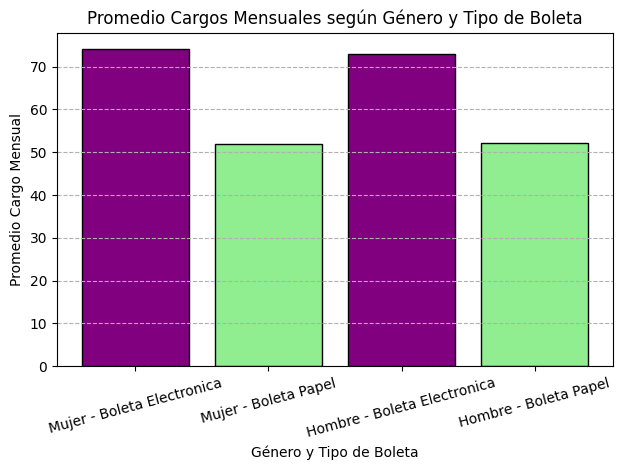

In [141]:
# Gráfico Bivariado 2.

# Primero debo calcular los promedios según el tipo de género y la forma de facturación
mujer_si_prom = df[(df["gender"] == "Female") & (df["PaperlessBilling"] == "Yes")]["MonthlyCharges"].mean()
mujer_no_prom = df[(df["gender"] == "Female") & (df["PaperlessBilling"] == "No")]["MonthlyCharges"].mean()
hombre_si_prom = df[(df["gender"] == "Male") & (df["PaperlessBilling"] == "Yes")]["MonthlyCharges"].mean()
hombre_no_prom = df[(df["gender"] == "Male") & (df["PaperlessBilling"] == "No")]["MonthlyCharges"].mean()

# Datos y etiquetas
promedios = [mujer_si_prom, mujer_no_prom, hombre_si_prom, hombre_no_prom]
etiquetas = ["Mujer - Boleta Electronica", "Mujer - Boleta Papel", "Hombre - Boleta Electronica", "Hombre - Boleta Papel"]

# Crear gráfico de columnas
plt.bar(etiquetas, promedios, color=["purple", "lightgreen", "purple", "lightgreen"], edgecolor="black")

# Títulos y etiquetas
plt.title("Promedio Cargos Mensuales según Género y Tipo de Boleta")
plt.ylabel("Promedio Cargo Mensual")
plt.xlabel("Género y Tipo de Boleta")
plt.grid(axis="y", linestyle="--")
plt.xticks(rotation=15)
plt.tight_layout()

# Mostrar gráfico
plt.show()


 * El gráfico muestra que los cargos mensuales promedio pueden variar según el tipo de boleta elegida (electrónica o papel), y no existe diferencia significativa entre hombres y mujeres.
 * También se observa que, en promedio, tanto hombres como mujeres que utilizan boleta electrónica pagan más que los que utilizan boleta de papel.